In [26]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/spotifyclassifier-b2d573dee4ec.json"

In [30]:
!pip install google-api-python-client
from googleapiclient.discovery import build
import json
import pandas as pd
gcs_service = build('storage', 'v1')

In [31]:
from google.cloud import bigquery
# Construct a BigQuery client object.
client = bigquery.Client()

In [32]:
query_string = """
SELECT * from
spotifyclassifier.features.predictions_test
"""

dataframe = (
    client.query(query_string)
    .result()
    .to_dataframe(
    )
)

In [33]:
dataframe.head(5)

,id,super_genre,subgenre,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date,popularity,pitch0,pitch1,pitch2,pitch3,pitch4,pitch5,pitch6,pitch7,pitch8,pitch9,pitch10,pitch11,timbre0,timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,timbre10,timbre11,__index_level_0__,label,features,rawPrediction,prediction
0,0JFwZZHhfRhEgwCVOY8MFQ,dance,edm,0.395,0.948,-3.763,0,0.0516,0.00765,0.001020,0.3050,0.486,176.012,4,2010,0,0.307419,0.373004,0.196992,0.390626,0.358940,0.338512,0.575239,0.402123,0.608288,0.349109,0.324388,0.431556,55.059243,101.510958,6.363132,-11.244892,21.717892,-36.008463,-9.327045,2.100149,-4.530671,5.496821,-8.070521,-0.207231,6116,0.0,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",3.0
1,1eq6pDTqBszNFlnQ1owhLy,dance,edm,0.767,0.726,-3.285,0,0.1950,0.00239,0.000005,0.0422,0.941,129.936,4,2013,0,0.437459,0.611615,0.348782,0.503112,0.414066,0.341634,0.423715,0.307178,0.434602,0.265294,0.318338,0.433451,51.747129,53.501134,13.010869,11.033996,13.410768,-36.678842,-2.589968,2.922251,-5.520145,5.873588,-19.560063,-3.572522,9344,0.0,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0.0
2,2u0SSpdM9XNfzWAwoJWxzF,dance,edm,0.740,0.762,-6.049,0,0.0403,0.00254,0.776000,0.2520,0.163,128.000,4,2013,40,0.547658,0.462664,0.295612,0.265130,0.246485,0.258461,0.305056,0.452728,0.305840,0.277645,0.358018,0.321762,48.547989,44.245874,-49.369881,-7.730840,-3.470988,-32.868013,-11.788195,-5.930743,-4.392462,7.570892,-10.784480,-3.142564,9345,0.0,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0.0
3,2uXQrjOL3kT5ZiLfu21onO,dance,edm,0.670,0.740,-5.736,0,0.0330,0.01050,0.000002,0.2340,0.357,130.064,4,2013,42,0.467372,0.500897,0.250192,0.287259,0.244571,0.367477,0.362299,0.291700,0.405100,0.293123,0.398397,0.376835,48.711600,41.133160,-7.944528,-4.908802,39.648806,-36.390948,10.098979,1.459604,-6.696420,5.751458,-11.203181,-1.095838,9346,0.0,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0.0
4,3WS7spXVlbeC5kjePmHMQW,dance,edm,0.735,0.555,-8.840,0,0.0366,0.38200,0.856000,0.0952,0.523,100.010,4,2006,60,0.396650,0.616220,0.249929,0.294458,0.358391,0.238424,0.265867,0.233377,0.395864,0.341198,0.238298,0.338143,44.106896,-26.506921,13.211951,6.361173,8.343962,-18.376161,-2.502558,-6.370753,0.632654,-4.311828,-9.287139,-2.719585,3834,0.0,"{'type': 1, 'size': None, 'indices': None, 'va...","{'type': 1, 'size': None, 'indices': None, 'va...",0.0


In [34]:
from sklearn.metrics import confusion_matrix

y_true = dataframe["label"]
y_pred = dataframe["prediction"]

cnf_matrix = confusion_matrix(y_true, y_pred,labels=range(10))

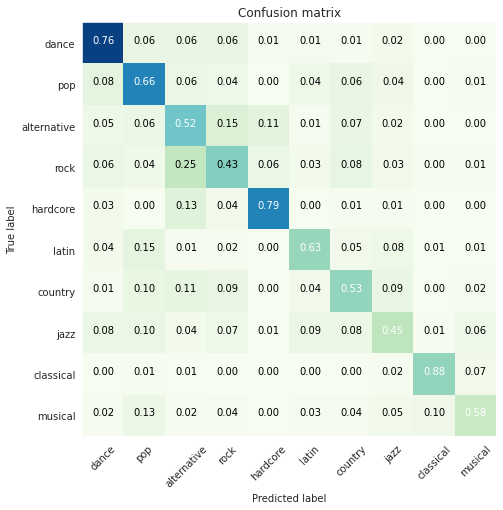

In [35]:
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
plt.figure(figsize=(7,7))
plt.grid(False)

label_mapping = ['dance', 'pop', 'alternative', 'rock', 'hardcore', 'latin', 'country', 'jazz', 'classical', 'musical']

# call pre defined function
plot_confusion_matrix(cnf_matrix, classes=label_mapping)